# Number Recognition with MNIST Dataset

In [1]:
# Importing Libaries
import tensorflow as tf
import keras 
from keras.models import Sequential
from keras.layers import Dense , Dropout , Flatten
from keras.layers import Conv2D , MaxPooling2D
from keras import backend as k
from keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Load dataset
from keras.datasets import mnist

In [3]:
# Split the dataset
(X_train , y_train) , (X_test , y_test)=mnist.load_data()

11490434/11490434 [==============================] - 5s 0us/step


In [4]:
# Shape of the dataset
print(X_train.shape , y_train.shape)

(60000, 28, 28) (60000,)


In [5]:
# Reshape of the dataset
X_train=X_train.reshape(X_train.shape[0],28,28,1)
X_test=X_test.reshape(X_test.shape[0],28,28,1)
input_shape=(28,28,1)

In [6]:
#Convert class vectors to binary class metrics

In [7]:
num_classes=10
y_train=keras.utils.to_categorical(y_train, num_classes)
y_test=keras.utils.to_categorical(y_test,num_classes)

In [8]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalizing the data
X_train=X_train/255
X_test=X_test/255

In [9]:
print('X_train.shape', X_test.shape)
print(X_train.shape[0],'Train Sample')
print(X_test.shape[0],'Test Sample')

X_train.shape (10000, 28, 28, 1)
60000 Train Sample
10000 Test Sample


### Create The Model ###

In [11]:
model=Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))


In [12]:
# Compile model
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])

In [13]:
# Model training
model.fit(X_train,y_train , batch_size=128,epochs=10,verbose=1,validation_data=(X_test,y_test))
print("The Model has Successfully Trained")

Epoch 1/10
469/469 [==============================] - 242s 513ms/step - loss: 2.2797 - accuracy: 0.1482 - val_loss: 2.2419 - val_accuracy: 0.2703
Epoch 2/10
469/469 [==============================] - 246s 524ms/step - loss: 2.2183 - accuracy: 0.2613 - val_loss: 2.1687 - val_accuracy: 0.4465
Epoch 3/10
469/469 [==============================] - 248s 529ms/step - loss: 2.1417 - accuracy: 0.3740 - val_loss: 2.0698 - val_accuracy: 0.6156
Epoch 4/10
469/469 [==============================] - 249s 532ms/step - loss: 2.0340 - accuracy: 0.4851 - val_loss: 1.9313 - val_accuracy: 0.7060
Epoch 5/10
469/469 [==============================] - 260s 555ms/step - loss: 1.8844 - accuracy: 0.5681 - val_loss: 1.7391 - val_accuracy: 0.7545
Epoch 6/10
469/469 [==============================] - 224s 478ms/step - loss: 1.6865 - accuracy: 0.6263 - val_loss: 1.4954 - val_accuracy: 0.7808
Epoch 7/10
469/469 [==============================] - 326s 695ms/step - loss: 1.4625 - accuracy: 0.6631 - val_loss: 1.2377 -

In [14]:
# Model evaluating
score=model.evaluate(X_test,y_test ,verbose=2)
print('test loss:',score[0])
print('test accuracy:',score[1])

313/313 - 11s - loss: 0.7446 - accuracy: 0.8372 - 11s/epoch - 35ms/step
test loss: 0.7445926070213318
test accuracy: 0.8371999859809875


In [15]:
# Model Saving
model.save('mnist.model')
print('Saving the model as mnist.h5')

INFO:tensorflow:Assets written to: mnist.model\assets


INFO:tensorflow:Assets written to: mnist.model\assets


Saving the model as mnist.h5


In [16]:
# Prediction 

In [17]:
new_model=load_model('mnist.model')

In [18]:
prediction=new_model.predict(X_test)

313/313 [==============================] - 12s 38ms/step


In [19]:
print(prediction)

[[6.2605035e-03 4.3704128e-03 1.0309478e-02 ... 8.6038637e-01
  2.3276407e-02 4.5951579e-02]
 [3.8374279e-02 3.1598840e-02 5.4626691e-01 ... 4.9715093e-04
  3.8693238e-02 1.6476972e-03]
 [8.5822418e-03 6.6571546e-01 6.1313026e-02 ... 2.7682278e-02
  5.1178116e-02 3.7128270e-02]
 ...
 [3.8846238e-03 2.6136640e-02 1.3314420e-02 ... 1.1582682e-01
  1.3873614e-01 3.0010262e-01]
 [5.2285872e-02 1.0114026e-01 3.1015482e-02 ... 5.5248681e-02
  2.8176975e-01 5.1031813e-02]
 [4.2014446e-02 3.4681798e-04 5.1975861e-02 ... 1.1178463e-04
  8.1237184e-04 1.1681094e-03]]


In [20]:
print(np.argmax(prediction[5]))

1


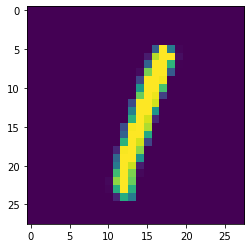

In [21]:
plt.imshow((tf.squeeze(X_test[5])))
plt.show()

In [22]:
#predict on the first five images
pred=model.predict(X_test[:5])
# print our model prediction
print(np.argmax(pred ,axis=1))
print(y_test[:5])


1/1 [==============================] - 0s 121ms/step
[7 2 1 0 4]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


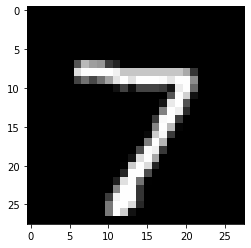

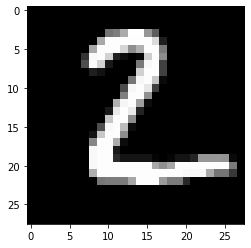

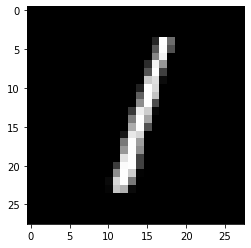

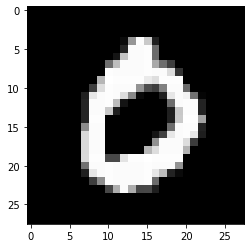

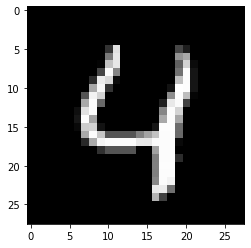

In [23]:
for i in range (0,5):
  first_img=X_test[i]
  first_img=np.array(first_img,dtype='float')
  pixels=first_img.reshape((28,28))
  plt.imshow(pixels, cmap='gray')
  plt.show()